# Autism Screening on Adults- Final Results

Autism or Autism Spectrum Disorder (ASD) is a neuro- disorder which can be considered as a behavioral disease in which the effect of the disorder is lifelong. According to medical science, the condition starts from childhood and conitnues to adolescence and adulthood. .

## Dataset

The data set for analyszing the disorder is collected by a survey conducted through an application called ASD. The participants answered around 21 questions ro collect the data.The data was available for three different categories; a) for adult b) for child c) for adolescent. We have selected the ASD screening dataset for adults. The data set is available in the kaggle platform as well as UCI Machine Learning Repository.

### Different Variables in the dataset

Attribute Id  Attributes Description
1               Patient age
2               Sex
3               Nationality
4               The patient suffered from Jaundice problem by birth
5               Any family member suffered from pervasive development disorders
6               Who is fulfilment the experiment
7               The country in which the user lives
8               Screening Application used by the user before or not?
9               Screening test type
10-19           Based on the screening method answers of 10 questions
20              Screening Score

Importing important packages

In [161]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Reading the data set

In [162]:
df=pd.read_csv('autism_screening.csv')

printing the initial few rows of the data set

In [163]:
print(df.head(5))

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ...  gender       ethnicity jundice austim  \
0         1         0          0  ...       f  White-European      no     no   
1         1         0          1  ...       m          Latino      no    yes   
2         1         1          1  ...       m          Latino     yes    yes   
3         1         0          1  ...       f  White-European      no    yes   
4         1         0          0  ...       f               ?      no     no   

   contry_of_res used_app_before result     age_desc relation Class/

The first 10 columns A1_Score to A10_Score are answersed by the participants inorder to test AQ (Autism Spectrum Quotient). Those questions will be scored as either 1 or 0. The sum of these scores are stored in the other column named 'result'. If the total score is 6 or above, the participant may fall into autism spectrum.

Since the sum of scores are avialable in the result column. Let's discard the first few columns of the data set for now.

In [164]:
df_revised=df.loc[:,'age':'Class/ASD']

In [165]:
print(df_revised.head(5))

    age gender       ethnicity jundice austim  contry_of_res used_app_before  \
0  26.0      f  White-European      no     no  United States              no   
1  24.0      m          Latino      no    yes         Brazil              no   
2  27.0      m          Latino     yes    yes          Spain              no   
3  35.0      f  White-European      no    yes  United States              no   
4  40.0      f               ?      no     no          Egypt              no   

   result     age_desc relation Class/ASD  
0     6.0  18 and more     Self        NO  
1     5.0  18 and more     Self        NO  
2     8.0  18 and more   Parent       YES  
3     6.0  18 and more     Self        NO  
4     2.0  18 and more        ?        NO  


Overall structure of the dataset

In [166]:
df_revised.dtypes

age                float64
gender              object
ethnicity           object
jundice             object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD           object
dtype: object

Summary of the numerical variables

In [167]:
df_revised.shape
df_revised.describe()

,age,result
count,702.000000,704.000000
mean,29.698006,4.875000
std,16.507465,2.501493
min,17.000000,0.000000
25%,21.000000,3.000000
50%,27.000000,4.000000
75%,35.000000,7.000000
max,383.000000,10.000000


The count of age is 2 less that the result which could occur because the two values might be missing for the variable age. However, the mean age of the participants who participated in the sample is 29.7 and the median or second quartile is 27. i.e, 50% of the particioants are above the age of 27.

The mean value of the result is 4.875 and the 50% quartile is 4 which means 50% of the people in the data set has values score greater than 4. As per the guidelines, the participants who have a score greater than 6 can be considered referring them  for a special diagnostic assessment.

In [168]:
df_revised.isnull().sum()

age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

We can see 2 null values for the column age. Let's drop the rows with null values for now.

In [169]:
missing=df_revised['age'].isnull()
df_revised.loc[missing,:]


,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
62,NaN,m,?,no,no,Saudi Arabia,no,0.0,18 and more,?,NO
91,NaN,f,?,no,no,Jordan,no,4.0,18 and more,?,NO


In [170]:
df_revised=df_revised.dropna(axis=0,how='any')

Now we deleted the rows with NA values in age column, there are 702 rows left

If we look at the summary of the age variable. The maximum value for the age is 383 which is an outlier. Deleting the outlier in the age column.

In [171]:
df_revised[df_revised.age==df_revised['age'].max()]

,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
52,383.0,f,Pasifika,no,no,New Zealand,no,1.0,18 and more,Self,NO


In [172]:
df_revised=df_revised.drop(labels=52)
df_revised

,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,40.0,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...
699,25.0,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,34.0,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,24.0,f,?,no,no,Russia,no,7.0,18 and more,?,YES
702,35.0,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


In [173]:
df_revised.nunique()

age                45
gender              2
ethnicity          12
jundice             2
austim              2
contry_of_res      67
used_app_before     2
result             11
age_desc            1
relation            6
Class/ASD           2
dtype: int64

### Further Analysis

Finding any relationship between age and the result column

<Figure size 432x288 with 0 Axes>

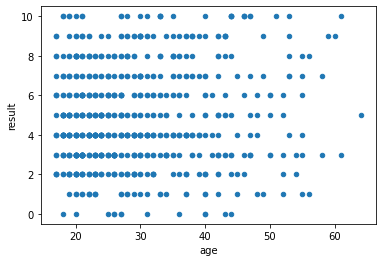

In [174]:
plt.figure()
df_revised.plot.scatter('age','result')
#plt.bar(df_revised['age'],df_revised['result'],color='red')
plt.show()

As we can see in the above graph, age does not show any significant effect on the result score.For example, people at (say 20) have a score from 0 to 10.

There gender column distinguishes the male and female participants in the survey. There were 366 males and 335 females in the data set.

In [175]:
df_revised['gender'].value_counts()

m    366
f    335
Name: gender, dtype: int64

The varibale ethnicity describes the social group in which the participant belong to.

In [176]:
df_revised['ethnicity'].unique()

array(['White-European', 'Latino', '?', 'Others', 'Black', 'Asian',
       'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic',
       'Turkish', 'others'], dtype=object)

We could see a ? in the data set which is unknown. Lets change the ? with the value unknown

In [177]:
df_revised['ethnicity'] = df_revised['ethnicity'].replace('?', 'Unknown')

We can also see two others which has been identified as two different unique values. Replacing otheres with Others in the ethinicity variable

In [178]:
df_revised['ethnicity'] = df_revised['ethnicity'].replace('others', 'Others')

In [179]:
df_revised

,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,40.0,f,Unknown,no,no,Egypt,no,2.0,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...
699,25.0,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,34.0,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,24.0,f,Unknown,no,no,Russia,no,7.0,18 and more,?,YES
702,35.0,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


The below graph shows the result score differentiated with gender variable. The graph depicts that compared to females, male cateogory has higher number of adults with AQ resulting score greater than 3.

<Figure size 432x288 with 0 Axes>

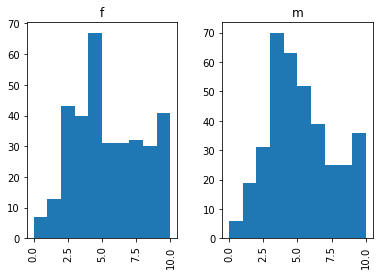

In [180]:

plt.figure()
df_revised.hist(column='result', by='gender')
plt.show()

Whether the participant is already identified in ASD class or not is recorded in the data set under the column 'Class/ASD'. There are 189 participants who are idenfified with autism diorder.

In [181]:
df_revised['Class/ASD'].value_counts()

NO     512
YES    189
Name: Class/ASD, dtype: int64

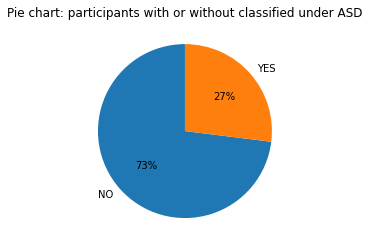

In [182]:

plt.figure()
plt.pie(df_revised['Class/ASD'].value_counts(),labels=df_revised['Class/ASD'].unique(),startangle=90, autopct='%1.0f%%')
plt.title('Pie chart: participants with or without classified under ASD')
plt.show()

The number of particpants with result score 6 or above is 259.

In [183]:
len(df_revised.query('result>=6'))

259

The graph below says that there is a strong relationship between the ASD class and result scored by the particpants. if the score is above 7, then those participants are under ASD class as per the dataset.

In [184]:
ASD_col=df_revised['Class/ASD']
result=df_revised.query('result>=6')

<Figure size 432x288 with 0 Axes>

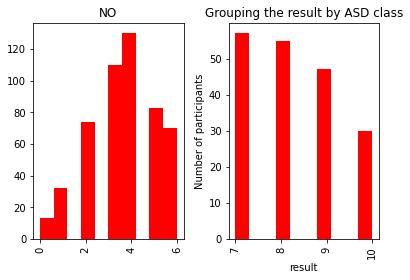

In [185]:
plt.figure()
df_revised.hist(column='result', by='Class/ASD', color='red')
plt.xlabel('result')
plt.ylabel('Number of participants')
plt.title('Grouping the result by ASD class')
plt.show()

From the below graph, we can say that participants who are Latinos have scored from 5 to 10. Asians, black and white- European have got all range of score 0 to 10. We cannot figure out a strong relationship between ethnicity and result at a glance.

<Figure size 432x288 with 0 Axes>

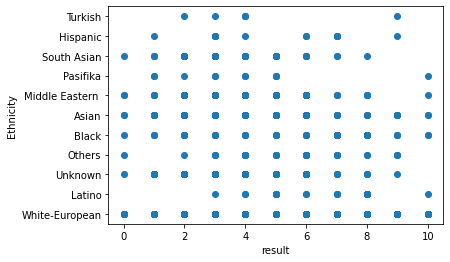

In [186]:
plt.figure()
fig, ax = plt.subplots()
ax.scatter(df_revised['result'],df_revised['ethnicity'])
plt.xlabel('result')
plt.ylabel('Ethnicity')
plt.show()

In conlcusion, we can see a significant correlation between result and ASD classification. Age and result do not show any connection and the males in the survey participants have comparitively higher score than females.

In [187]:
for col in df_revised:
    print(df[col].unique())

[ 26.  24.  27.  35.  40.  36.  17.  64.  29.  33.  18.  31.  30.  34.
  38.  42.  43.  48.  37.  55.  50.  53.  20.  28.  21. 383.  47.  32.
  44.  nan  19.  58.  45.  22.  39.  25.  23.  54.  60.  41.  46.  56.
  61.  59.  52.  49.  51.]
['f' 'm']
['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']
['no' 'yes']
['no' 'yes']
['United States' 'Brazil' 'Spain' 'Egypt' 'New Zealand' 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland' 'United Arab Emirates'
 'Afghanistan' 'Lebanon' 'United Kingdom' 'South Africa' 'Italy'
 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China' 'Australia' 'Canada'
 'Saudi Arabia' 'Netherlands' 'Romania' 'Sweden' 'Tonga' 'Oman' 'India'
 'Philippines' 'Sri Lanka' 'Sierra Leone' 'Ethiopia' 'Viet Nam' 'Iran'
 'Costa Rica' 'Germany' 'Mexico' 'Russia' 'Armenia' 'Iceland' 'Nicaragua'
 'Hong Kong' 'Japan' 'Ukraine' 'Kazakhstan' 'AmericanSamoa' 'Uruguay'
 'Serbia' 'Portugal' 'Malaysi

## Modelling the data

In [188]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import numpy as np
import seaborn as sn

The response variable for our study is the categorical variable 'class/ASD' which is the screening test type. i.e, This variable will classify the individuals into persons with ASD (Autism Spectrum Disorder) and without ASD. The KNN model will be aplied on our predictor variables inorder to classify our response variable.

Response Variable: Class/ASD
Predictor variables to be considering: 
age,
gender,
ethnicity,
jundice,
autism,
result,
country of residence.

In [189]:
df_revised.columns

Index(['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

#### Renaming few variables to rectify some mistakes

In [190]:
df_revised.rename(columns = {'jundice':'jaundice', 'austim':'autism','contry_of_res':'country','Class/ASD':'Class'}, inplace = True)

In [191]:
df_revised.columns

Index(['age', 'gender', 'ethnicity', 'jaundice', 'autism', 'country',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class'],
      dtype='object')

#### Dividing the data frame into response variable and predictor variables

### Predictor variables are given below

In [192]:
X=df_revised.drop(columns=['Class','relation','age_desc','used_app_before'], axis = 1) 
print(X.head())

    age gender       ethnicity jaundice autism        country  result
0  26.0      f  White-European       no     no  United States     6.0
1  24.0      m          Latino       no    yes         Brazil     5.0
2  27.0      m          Latino      yes    yes          Spain     8.0
3  35.0      f  White-European       no    yes  United States     6.0
4  40.0      f         Unknown       no     no          Egypt     2.0


### Response variable

In [193]:
Y=df_revised['Class']
print(Y.head())

0     NO
1     NO
2    YES
3     NO
4     NO
Name: Class, dtype: object


#### Dividing the predictor variables into categorical and numerical variables

### Categorical predictor variables are grouped together below

In [194]:
cat_cols = X.select_dtypes(include='object').columns
X_cat = X[cat_cols]
print(X_cat)


    gender       ethnicity jaundice autism        country
0        f  White-European       no     no  United States
1        m          Latino       no    yes         Brazil
2        m          Latino      yes    yes          Spain
3        f  White-European       no    yes  United States
4        f         Unknown       no     no          Egypt
..     ...             ...      ...    ...            ...
699      f  White-European       no     no         Russia
700      m        Hispanic       no     no         Mexico
701      f         Unknown       no     no         Russia
702      m     South Asian       no     no       Pakistan
703      f  White-European       no     no         Cyprus

[701 rows x 5 columns]


### Numerical predictor variables are grouped together below

In [195]:
X_num=X[['age','result']]
print(X_num)

      age  result
0    26.0     6.0
1    24.0     5.0
2    27.0     8.0
3    35.0     6.0
4    40.0     2.0
..    ...     ...
699  25.0     7.0
700  34.0     3.0
701  24.0     7.0
702  35.0     6.0
703  26.0     8.0

[701 rows x 2 columns]


#### Scaling the numerical variables

In [196]:
X_num = preprocessing.StandardScaler().fit_transform(X_num)

#### Converting the categorical variables into numerical labels

In [197]:
X_cat = pd.get_dummies(X_cat)
Y = pd.get_dummies(Y)

#### Dimensions of the dataframes for categorical, numerical and response variable

In [200]:
print(X_num.shape)
print(X_cat.shape)
print(Y.shape)

(701, 2)
(701, 84)
(701, 2)


In [201]:
print(X_cat.isnull().sum())

gender_f                        0
gender_m                        0
ethnicity_Asian                 0
ethnicity_Black                 0
ethnicity_Hispanic              0
                               ..
country_United Arab Emirates    0
country_United Kingdom          0
country_United States           0
country_Uruguay                 0
country_Viet Nam                0
Length: 84, dtype: int64


In [202]:
print(X_cat.head())
print(Y.head())

   gender_f  gender_m  ethnicity_Asian  ethnicity_Black  ethnicity_Hispanic  \
0         1         0                0                0                   0   
1         0         1                0                0                   0   
2         0         1                0                0                   0   
3         1         0                0                0                   0   
4         1         0                0                0                   0   

   ethnicity_Latino  ethnicity_Middle Eastern   ethnicity_Others  \
0                 0                          0                 0   
1                 1                          0                 0   
2                 1                          0                 0   
3                 0                          0                 0   
4                 0                          0                 0   

   ethnicity_Pasifika  ethnicity_South Asian  ...  country_Sri Lanka  \
0                   0                      0

#### Dividing the data into test and traing data set`

After scaling the numerical variables and converting the categorical variables into dummy values. Combined both to perform KNN model on our data. 

In [203]:
X_num=pd.DataFrame(X_num,columns=['age','result'])
X=pd.concat([X_num.reset_index(), X_cat.reset_index()], axis=1)


In [204]:
X.shape

(701, 88)

In [205]:
Y.isnull().sum()

NO     0
YES    0
dtype: int64

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#### Performing KNN alogorthtim on different k values 

The KNN model is run on the dataset for k=10 to 35. After that, used KNN score to identify the best k value for our tarin data

In [207]:
knnscore = []
for i in range(10,35):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train,y_train)
     k_score=knn.score(X_train,y_train)
     knnscore.append((i,k_score))

From the below data frame, we can see that when k=17, the KNN score is 0.782516 for the train data.

In [208]:
knnscore=pd.DataFrame(knnscore,columns=['K','KNN Score for train data'])
print(knnscore)

     K  KNN Score for train data
0   10                  0.710021
1   11                  0.759062
2   12                  0.733475
3   13                  0.769723
4   14                  0.739872
5   15                  0.771855
6   16                  0.750533
7   17                  0.782516
8   18                  0.729211
9   19                  0.754797
10  20                  0.731343
11  21                  0.746269
12  22                  0.720682
13  23                  0.737740
14  24                  0.727079
15  25                  0.739872
16  26                  0.733475
17  27                  0.742004
18  28                  0.735608
19  29                  0.744136
20  30                  0.733475
21  31                  0.744136
22  32                  0.735608
23  33                  0.742004
24  34                  0.735608


#### Performing KNN model with k=17

In [209]:
knn= KNeighborsClassifier(n_neighbors=17)

In [210]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

THe KNN score for the test data is 0.7

In [211]:
knn.score(X_test,y_test)

0.7025862068965517

#### predicting using our fitted model

In [212]:
preds = knn.predict(X_test)

In [213]:
preds=np.argmax(preds, axis = 1)

#### Evaluating our model

Below shows the accuracy rate of our model predicting the individuals in ASD class

In [214]:
print(accuracy_score(y_test[['YES']], preds))

0.7025862068965517


Below shows the confusion matrix for our model.
True positives(Count which the model identified ASD class correctly) : 154
True negatives (Count which the model identified non ASD class correctly) : 9
False positives (Count which the model incorrectly classified the adult into ASD class) : 19
False negatives (Count which the model incorrectly classified the adult into non- ASD class) : 50


In [215]:
c=confusion_matrix(y_test[['YES']], preds)
#confusion_matrix(y_test.values.argmax(axis=1), predictions.argmax(axis=1))
c

array([[154,  19],
       [ 50,   9]], dtype=int64)

The below heatmap shows the visual representation of the confusion matrix. The 0 represents class ASD= YES and 1 represents class ASD= NO

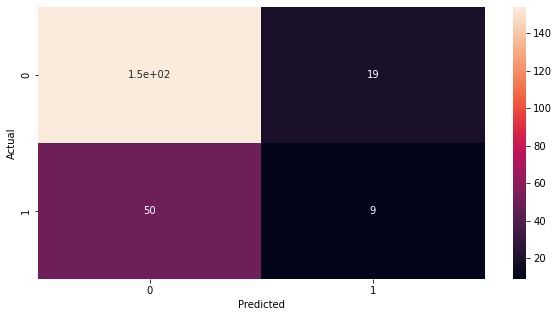

In [216]:
plt.figure(figsize=(10,5))
sn.heatmap(c,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Conclusion

The identified model has as accuracy rate 0.703 in identifying an adult comes under the ASD class. However, the number of false negatives are comparitively higher which could affect in identifying some of the individuals under class ASD.